In [1]:
# Needed libraries to train the decision tree model
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

#Needed libraries to see the decision tree
from sklearn.tree import export_graphviz
from io import StringIO  
from IPython.display import Image  
import pydotplus

In [2]:
#Set the dataset path
DATASET_PATH = "./data/diabetes.csv"
DECISION_TREE_IMAGE_PATH = "resources/decision_tree_visualization.png"

In [3]:
#Load the dataframe from csv file
diabetes_df = pd.read_csv(DATASET_PATH)

#check the dataframe feautures (columns from the dataframe)
print("Features:", list(diabetes_df.columns))

Features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [4]:
#Check the dataframe top 5 rows
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Select the features to be used and generate the dataset features and targets (labels)
features = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']

#Load the features selected
X = diabetes_df[features]

#Load the labels (Outcome)
y = diabetes_df.Outcome

In [6]:
#Split the dataset into train and test subsets (70% Train and 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [7]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [8]:
# Check the model accuracy
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.683982683982684


              precision    recall  f1-score   support

           0       0.74      0.77      0.75       146
           1       0.57      0.54      0.56        85

    accuracy                           0.68       231
   macro avg       0.66      0.65      0.66       231
weighted avg       0.68      0.68      0.68       231



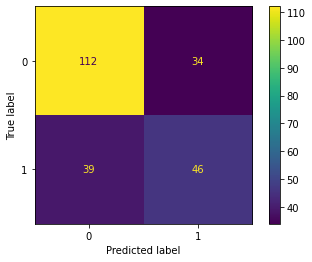

In [9]:
#Ploting the confusion matrix and classification report
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

print(classification_report(y_test, y_pred))

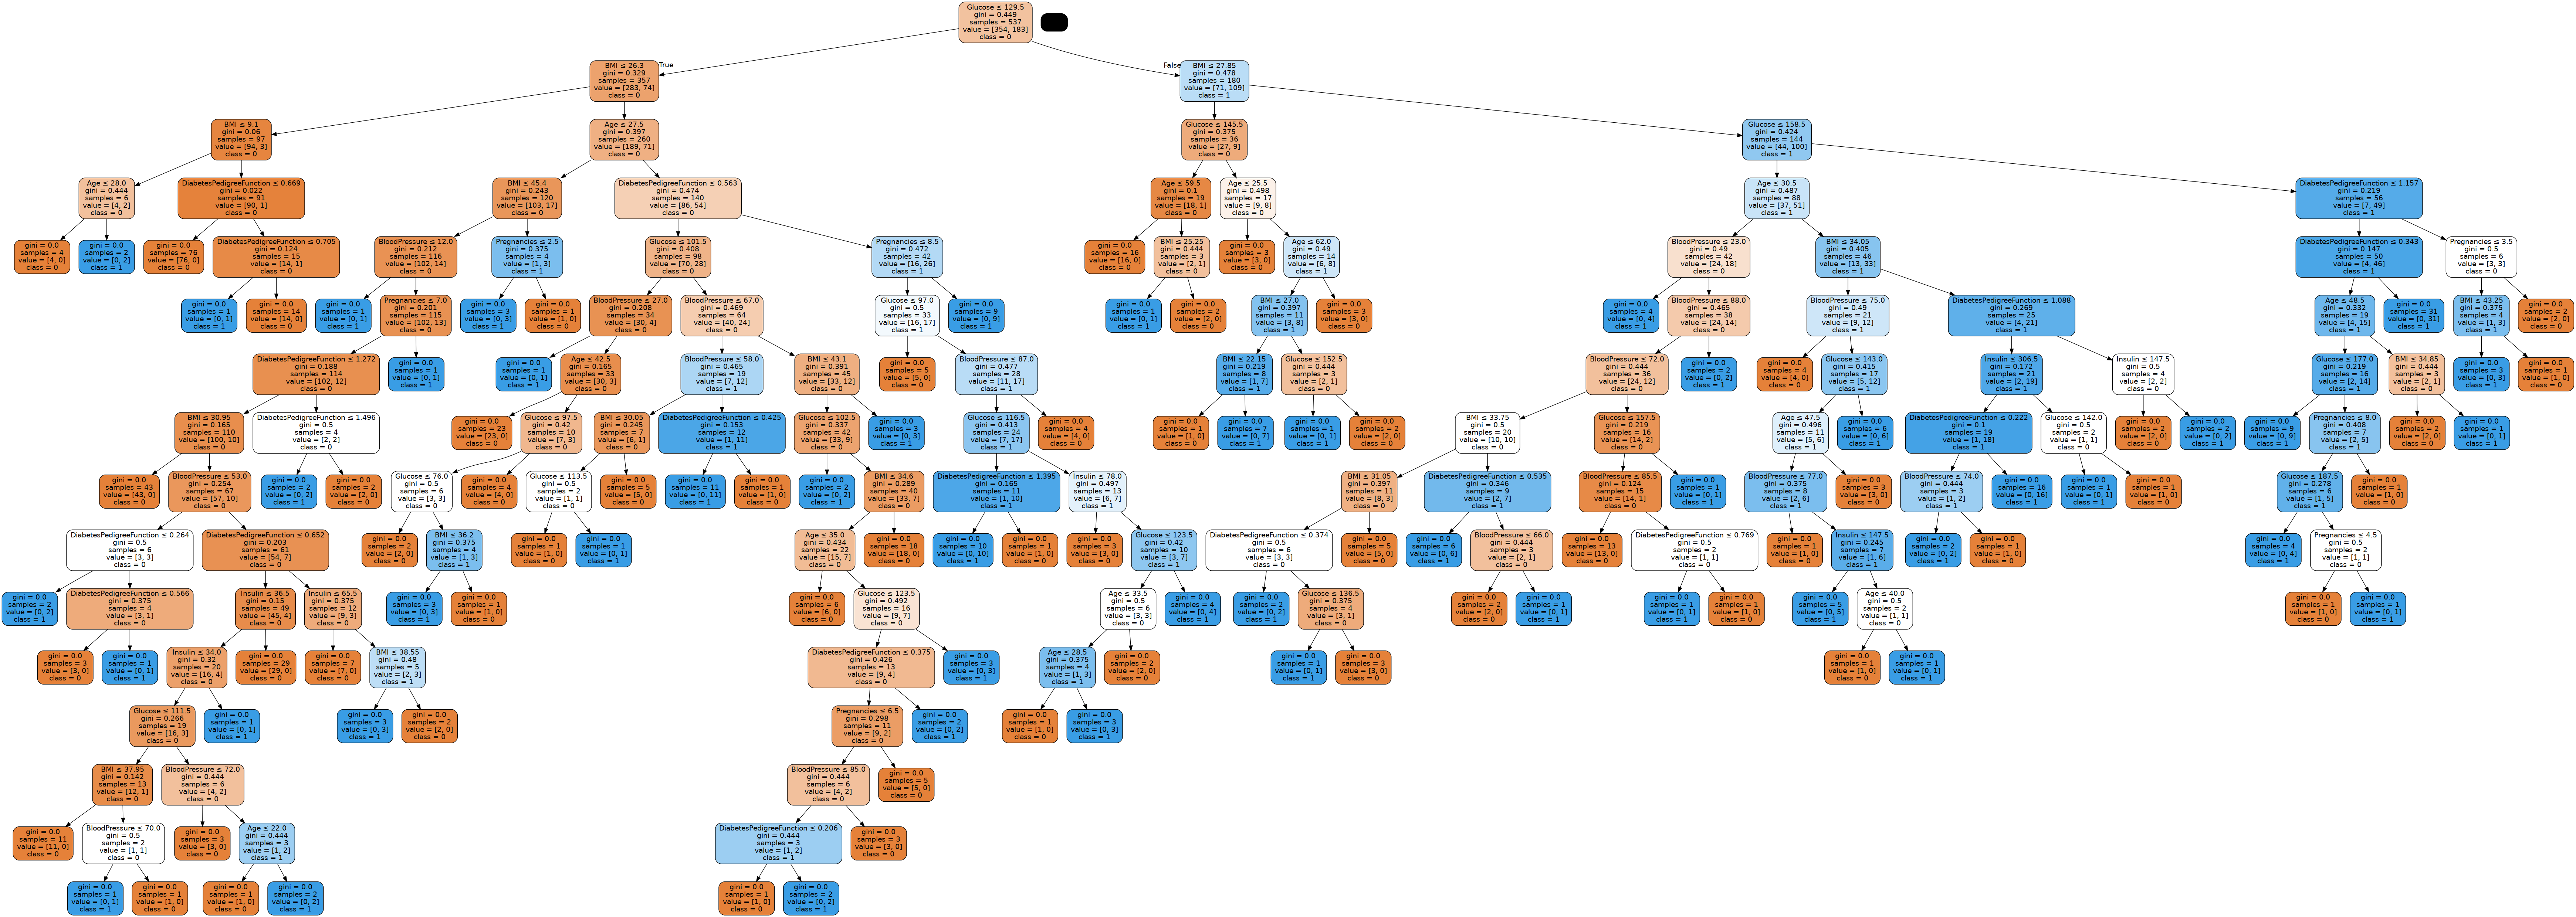

In [10]:
### Visualize the Decision Tree
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = features,
                class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(DECISION_TREE_IMAGE_PATH)

Image(graph.create_png())